<a href="https://colab.research.google.com/github/sensiboi/Technohacks-BA-Tasks/blob/main/A_B_testing_Task_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A/B Testing on Marketing Campaign**

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

**Import Dataset**

In [2]:
df = pd.read_csv('campaigns.csv')
df.head(10)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
5,2,Medium,5,2,2,34.67
6,2,Medium,5,2,3,27.98
7,2,Medium,5,2,4,27.72
8,3,Medium,12,1,1,44.54
9,3,Medium,12,1,2,37.94


In [3]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 548
Columns         : 6
Features        : ['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values  : 0
Unique Values   : 

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [4]:
df.describe()

,OutletID,AgeofOutlets,Campaigns,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


**EDA and Visualization**

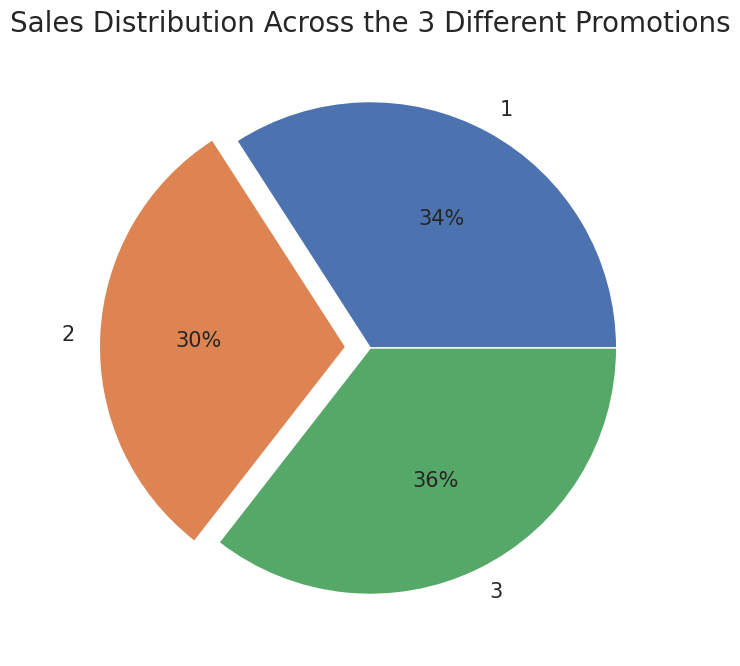

In [5]:
ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                explode = (0, 0.1, 0),
                                                                textprops = {'fontsize' : 15})
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions', fontsize = 20)

plt.show()

In [6]:
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID']

Campaigns  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: OutletID, dtype: int64

In [7]:
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Campaigns,,,
1,56,96,20
2,64,108,16
3,48,116,24


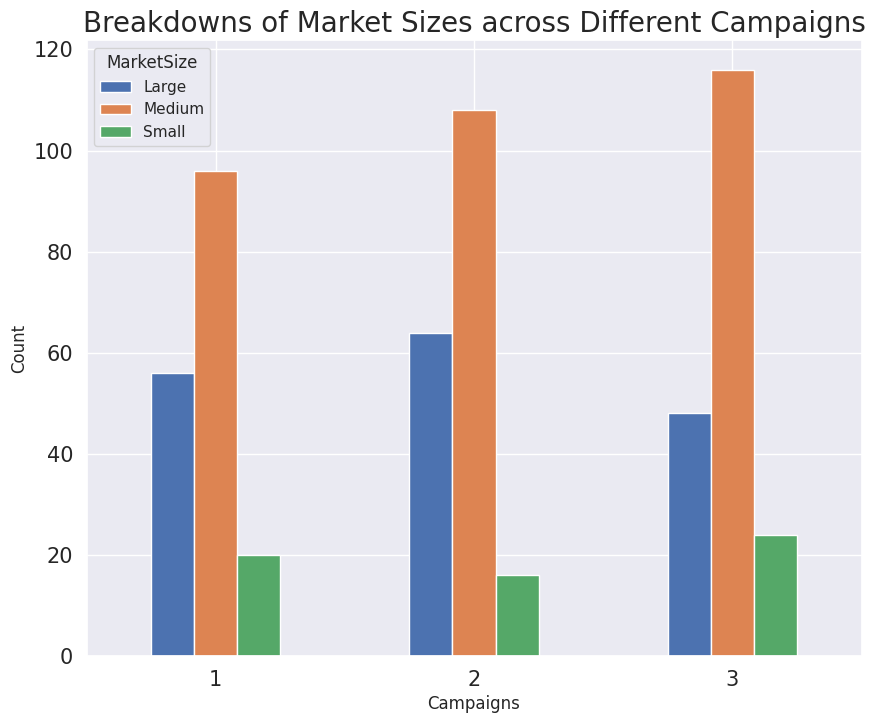

In [8]:
ax = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(10,8),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes across Different Campaigns', fontsize = 20)

plt.show()

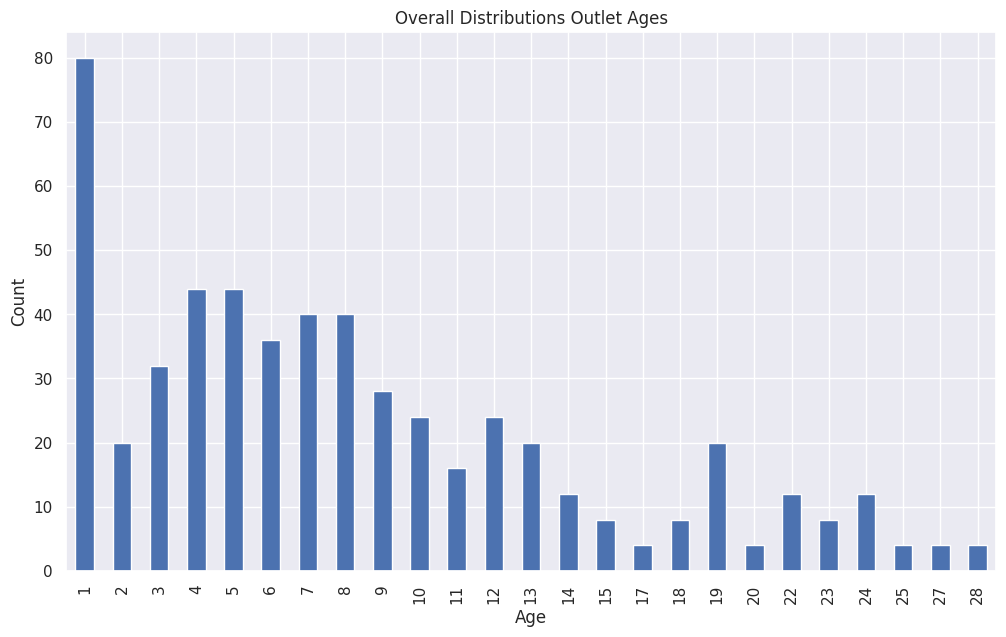

In [9]:
ax = df.groupby('AgeofOutlets').count()['OutletID'].plot(
    kind='bar',
    figsize=(12,7),
    grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Outlet Ages')

plt.show()


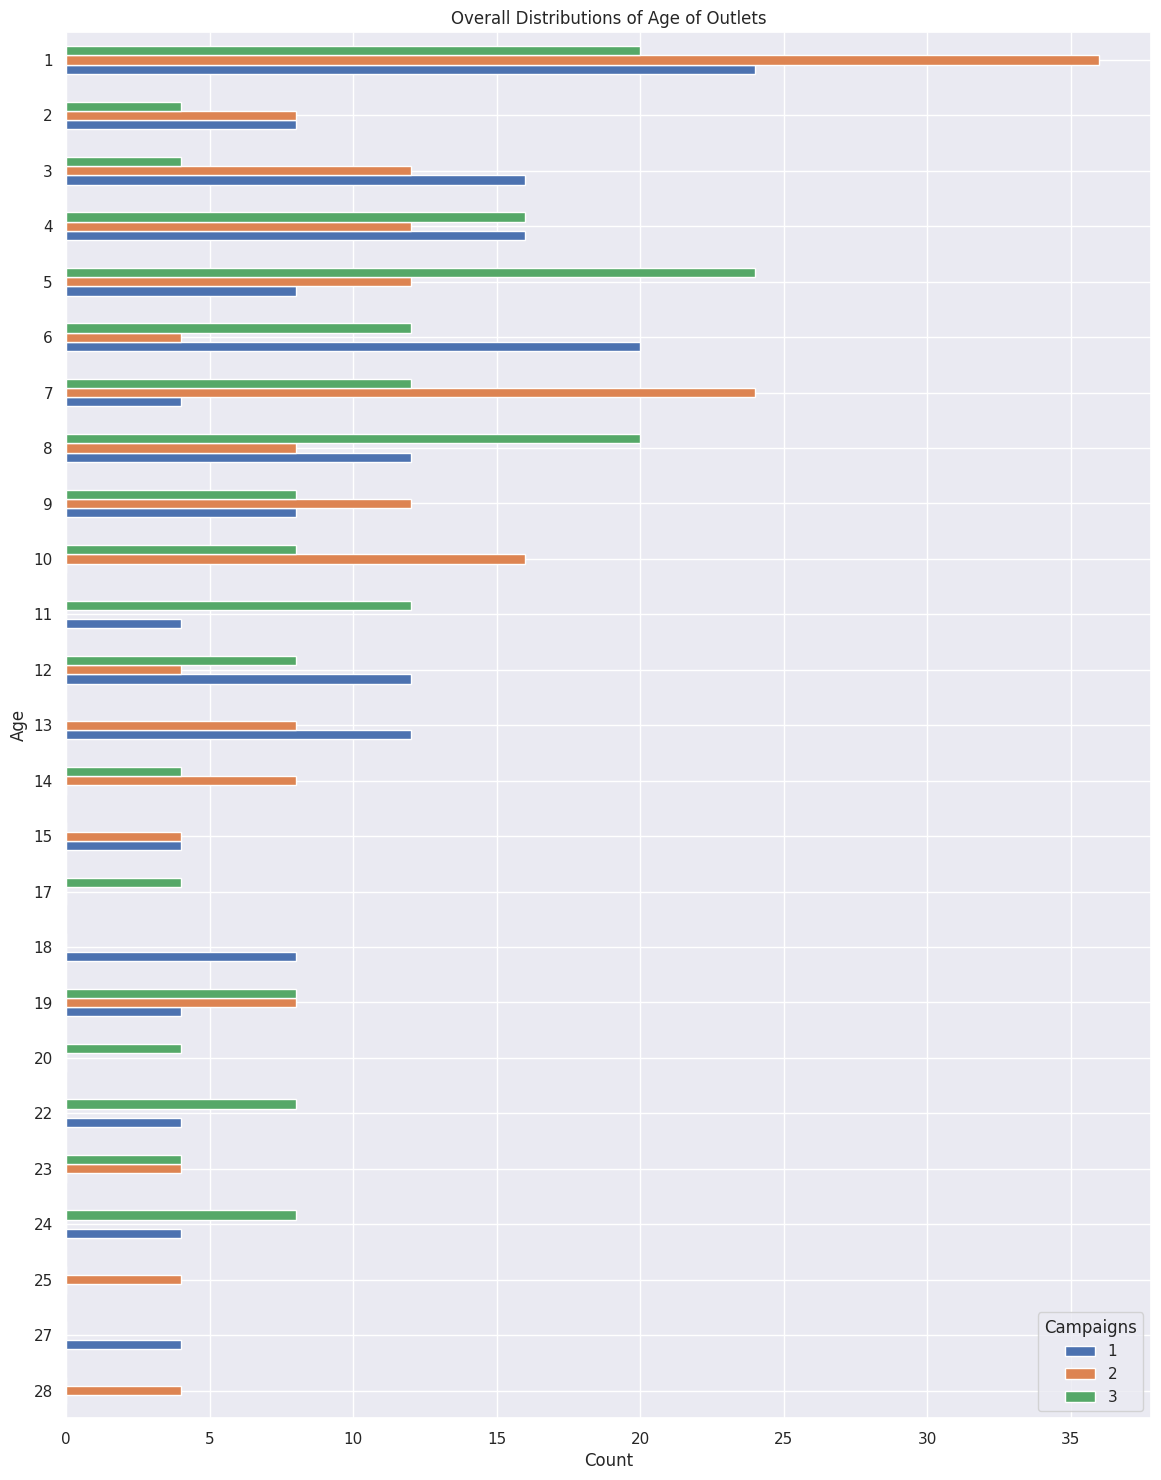

In [10]:
ax = df.groupby(['AgeofOutlets', 'Campaigns']).count()['OutletID'].unstack('Campaigns').iloc[::-1].plot(
    kind='barh',
    figsize=(14,18),
    grid=True)

ax.set_ylabel('Age')
ax.set_xlabel('Count')
ax.set_title('Overall Distributions of Age of Outlets')
plt.show()

In [11]:
df.groupby('Campaigns').describe()['AgeofOutlets']

,count,mean,std,min,25%,50%,75%,max
Campaigns,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


## **Performing A/B testing on 1st vs 2nd Campaign**

In [13]:
t, p = stats.ttest_ind(df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values,
                       equal_var=False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


# **Analysis of P and t-values (1 vs 2)**
Our p-Value is close to 0 which means that there is good evidence to reject the null hypothesis. Meaning the there is a statistical difference between the two groups. Our threshold rejectings the Null is usually less than 0.05.

Furthermore, the t-test shows that the marketing performances for these two groups are significantly different and that first marketing campaigns outperforms second marketing campaigns.

# **Performing A/B Testing on 1st vs 3rd Campaign**

In [14]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values,
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 1.5560224307758634
p-value = 0.12059147742229478


# **Analysis of P and t-values (1 vs 3)**
We note that the average sales from first marketing campaigns (58.1) is higher than those from third marketing campaigns (55.36). But, running a t-test between these two groups, gives us a t-value of 1.556 and a p-value of 0.121. The computed p-value is a lot higher than 0.05, past the threshold for statistical significance.

# **Performing A/B Testing on 2nd Vs 3rd Campaign**

In [15]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values,
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values,
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = -4.88139271089348
p-value = 1.5692733176039892e-06


# **Analysis of P and t-values (2 vs 3)**
Based on the average sales, second marketing campaigns (47.33) is higher than those from third marketing campaigns (55.36). If we run the t-test and between these two campaigns, results shows that the p-value (0.000001569) is lower than 0.05 threshold, which concludes that it rejects null hypotheses. In other words, there's statistical difference between second marketing campaigns and third marketing campaigns.